Much was accomplished in part three of this project.  A model was created to predict the winner of the 2018 World Series.  The model was validated using hold out sets and effectiveness was measured using several different metrics that were chosen to account for the class imbalance.  Hyperparameters of the logsitic regression model were optimized and a resampling method was applied to further mitigate the class imbalance of the data set.  Finally, the logistic regression model was applied to the previously unseen 2018 data and class probabilities were obtained for each team in the 2018 season.  For each team a probability of winning the World Series was calculated and plotted.

In this section we apply a bootstrapping approach to quantify the error in these predictions.

In [2]:
%%capture
%run Baseball_Project_Part_3.ipynb

In [3]:
from sklearn.utils import resample
pared_full_data['WSWin'] = WSWin


In the following code we instantiate the necessary pieces of the model pipeline, as defined and optimized in the previous sections.  We then train the logistic regression model and predict class probabilties 1000 different times.  At each iteration a new model is trained on a resampled version of the original data set.  The resampling is performed by randomly choosing individual samples from the original set with replacement to achieve a sample size equal to the original data set.  The resampled data set is stratified to account for the class imbalance.

In [4]:
prob_df = pd.DataFrame()
sc = StandardScaler()
pca = PCA(n_components = .90, svd_solver = 'full', random_state = 42)
enn = EditedNearestNeighbours(kind_sel = 'all', random_state = 42, n_neighbors = 25)
lr = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', C = 2.701, random_state = 100)
pipe = make_pipeline(sc, pca, enn, lr)

for i in range(1000):
    
    boot_data = resample(pared_full_data, n_samples = 540, stratify = WSWin)
    boot_WSWin = boot_data.WSWin
    boot_data.drop(['WSWin'], inplace = True, axis = 1)
    pipe.fit(boot_data, boot_WSWin);
    
    WS_prob = pipe.predict_proba(pared_data_2018)[:,1]
    prob_df = pd.concat([prob_df, pd.DataFrame(WS_prob[np.newaxis, :], columns = Teams)])

After calculating the class probabilities for each team 1000 times on the resampled data sets we can determine the mean and standard error of the mean for the probability of winning the World Series for each team.  This data is concatenated into a single data frame and plotted.

In [56]:
df_mean = prob_df.mean().round(3)
df_sem = prob_df.sem(axis = 0).round(3)
df_total = pd.concat([df_mean, df_sem], axis = 1, ignore_index = True)
df_total.columns = ['Mean', 'SEM']
df_total = df_total.sort_values(by = 'Mean', ascending = False)

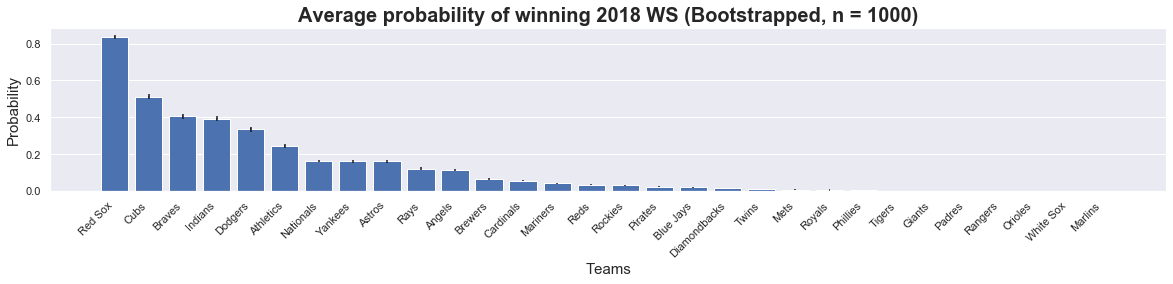

In [65]:
plt.figure(figsize = (20,3))
plt.bar(range(30), df_total.Mean, xerr = df_total.SEM, yerr = df_total.SEM, tick_label = df_total.index);
plt.xticks(rotation = 45, ha = 'right');
plt.grid(b = None, axis = 'x');
plt.xlabel("Teams", fontsize = 15);
plt.ylabel("Probability", fontsize = 15);
plt.title("Average probability of winning 2018 WS (Bootstrapped, n = 1000)", fontsize = 20, fontweight = 700);

The result from bootstrapping is similar to the single probability estimation in the previous part.  The Red Sox receive the highest probability, with other 2018 playoff teams near the top.  The teams at the bottom are those which had the worst seasons that year.  We can now add the standard error of the mean to our bar plots to get a sense of the error in our predictions.  

This concludes our exploration into predicting the 2018 World Series champion.  We began with data scraped from different web sources, combined those data together, cleaned up the data, built, validated, and trained a model, and made predictions that align well with the true outcome of the 2018 baseball season.